In [1]:
# 1. Drop unneeded columns in frames data

# header computed on one frame row (skipping rows 2-6) with following replace regex
# ([A-z]+)\s*\w+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+[\-0-9\.]+\s+
# $1\t$1Status\t$1LocX\t$1LocY\t$1LocZ\t$1OrW\t$1OrX\t$1OrY\t$1OrZ\t
header = ["Index","Time","SkeletonId","HandLeftConfidence","HandLeftState","HandRightConfidence","HandRightState","SpineBase","SpineBaseStatus","SpineBaseLocX","SpineBaseLocY","SpineBaseLocZ","SpineBaseOrW","SpineBaseOrX","SpineBaseOrY","SpineBaseOrZ","SpineMid","SpineMidStatus","SpineMidLocX","SpineMidLocY","SpineMidLocZ","SpineMidOrW","SpineMidOrX","SpineMidOrY","SpineMidOrZ","Neck","NeckStatus","NeckLocX","NeckLocY","NeckLocZ","NeckOrW","NeckOrX","NeckOrY","NeckOrZ","Head","HeadStatus","HeadLocX","HeadLocY","HeadLocZ","HeadOrW","HeadOrX","HeadOrY","HeadOrZ","ShoulderLeft","ShoulderLeftStatus","ShoulderLeftLocX","ShoulderLeftLocY","ShoulderLeftLocZ","ShoulderLeftOrW","ShoulderLeftOrX","ShoulderLeftOrY","ShoulderLeftOrZ","ElbowLeft","ElbowLeftStatus","ElbowLeftLocX","ElbowLeftLocY","ElbowLeftLocZ","ElbowLeftOrW","ElbowLeftOrX","ElbowLeftOrY","ElbowLeftOrZ","WristLeft","WristLeftStatus","WristLeftLocX","WristLeftLocY","WristLeftLocZ","WristLeftOrW","WristLeftOrX","WristLeftOrY","WristLeftOrZ","HandLeft","HandLeftStatus","HandLeftLocX","HandLeftLocY","HandLeftLocZ","HandLeftOrW","HandLeftOrX","HandLeftOrY","HandLeftOrZ","ShoulderRight","ShoulderRightStatus","ShoulderRightLocX","ShoulderRightLocY","ShoulderRightLocZ","ShoulderRightOrW","ShoulderRightOrX","ShoulderRightOrY","ShoulderRightOrZ","ElbowRight","ElbowRightStatus","ElbowRightLocX","ElbowRightLocY","ElbowRightLocZ","ElbowRightOrW","ElbowRightOrX","ElbowRightOrY","ElbowRightOrZ","WristRight","WristRightStatus","WristRightLocX","WristRightLocY","WristRightLocZ","WristRightOrW","WristRightOrX","WristRightOrY","WristRightOrZ","HandRight","HandRightStatus","HandRightLocX","HandRightLocY","HandRightLocZ","HandRightOrW","HandRightOrX","HandRightOrY","HandRightOrZ","HipLeft","HipLeftStatus","HipLeftLocX","HipLeftLocY","HipLeftLocZ","HipLeftOrW","HipLeftOrX","HipLeftOrY","HipLeftOrZ","KneeLeft","KneeLeftStatus","KneeLeftLocX","KneeLeftLocY","KneeLeftLocZ","KneeLeftOrW","KneeLeftOrX","KneeLeftOrY","KneeLeftOrZ","AnkleLeft","AnkleLeftStatus","AnkleLeftLocX","AnkleLeftLocY","AnkleLeftLocZ","AnkleLeftOrW","AnkleLeftOrX","AnkleLeftOrY","AnkleLeftOrZ","FootLeft","FootLeftStatus","FootLeftLocX","FootLeftLocY","FootLeftLocZ","FootLeftOrW","FootLeftOrX","FootLeftOrY","FootLeftOrZ","HipRight","HipRightStatus","HipRightLocX","HipRightLocY","HipRightLocZ","HipRightOrW","HipRightOrX","HipRightOrY","HipRightOrZ","KneeRight","KneeRightStatus","KneeRightLocX","KneeRightLocY","KneeRightLocZ","KneeRightOrW","KneeRightOrX","KneeRightOrY","KneeRightOrZ","AnkleRight","AnkleRightStatus","AnkleRightLocX","AnkleRightLocY","AnkleRightLocZ","AnkleRightOrW","AnkleRightOrX","AnkleRightOrY","AnkleRightOrZ","FootRight","FootRightStatus","FootRightLocX","FootRightLocY","FootRightLocZ","FootRightOrW","FootRightOrX","FootRightOrY","FootRightOrZ","SpineShoulder","SpineShoulderStatus","SpineShoulderLocX","SpineShoulderLocY","SpineShoulderLocZ","SpineShoulderOrW","SpineShoulderOrX","SpineShoulderOrY","SpineShoulderOrZ","HandTipLeft","HandTipLeftStatus","HandTipLeftLocX","HandTipLeftLocY","HandTipLeftLocZ","HandTipLeftOrW","HandTipLeftOrX","HandTipLeftOrY","HandTipLeftOrZ","ThumbLeft","ThumbLeftStatus","ThumbLeftLocX","ThumbLeftLocY","ThumbLeftLocZ","ThumbLeftOrW","ThumbLeftOrX","ThumbLeftOrY","ThumbLeftOrZ","HandTipRight","HandTipRightStatus","HandTipRightLocX","HandTipRightLocY","HandTipRightLocZ","HandTipRightOrW","HandTipRightOrX","HandTipRightOrY","HandTipRightOrZ","ThumbRight","ThumbRightStatus","ThumbRightLocX","ThumbRightLocY","ThumbRightLocZ","ThumbRightOrW","ThumbRightOrX","ThumbRightOrY","ThumbRightOrZ"]
cols = dict()
for i in range(len(header)) :
    cols[i] = header[i]
    
# confidence
for i in range(2,7) :
    del cols[i]
    
# joint name
for i in range(7,224,9) :
    del cols[i]
    
# 8 lower joints
for i in [116, 125, 134, 143, 152, 161, 170, 179] :
    for j in range(8) :
        del cols[i+j]
        
# always null orientations
for i in [39, 201, 210, 219, 228] :
    for j in range(4) :
        del cols[i+j]

# remove tracking status features
for i in [8, 17, 26, 35, 44, 53, 62, 71, 80, 89, 98, 107, 188, 197, 206, 215, 224] :
    del cols[i]
    
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_eggnog_skeleton(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    dataframe = pd.read_csv(filepath, header=None, skiprows=[0], usecols=list(cols.keys()), names=list(cols.values()))
    return dataframe

In [2]:
# 2. Train & test set construction

# hyperparameters
# moveDetectionDuraction (ns) : window of time around which the frames are considered as a start/end frame [-moveDetectionDuration,moveDetectionDuration]
moveDetectionDuration = 100000 # 20 ms


def load_timestamps(filepath):
    filepath = "datasets/eggnog.original/" + filepath
    # print(filepath)
    dataframe = pd.read_csv(filepath)
    return dataframe

def createFrameTest(sFrames, eFrames, timestamps) :
    def getFrameLabels(frame) :
        isSF, isEF = False, False
        for f in sFrames :
            if abs(frame[1] - timestamps[f][1]) < moveDetectionDuration :
                isSF = True
                #print(timestamps[f][1] - moveDetectionDuration, "<", frame[1], "<", timestamps[f][1] + moveDetectionDuration, "for frame",f)
                break
#        for f in eFrames :
#            if abs(frame[1] - f*1000000000/30) < moveDetectionDuration :
#                isEF = True
#                print(frame[1], "ef frame", f)
#                break
        return isSF
    return getFrameLabels
    


s01/part1_layout_p02/20151105_191251_00
s01/part1_layout_p02/20151105_192144_00
s01/part1_layout_p02/20151105_192312_00
s01/part1_layout_p02/20151105_192407_00
s01/part1_layout_p02/20151105_192610_00
s01/part1_layout_p02/20151105_192717_00
s01/part1_layout_p02/20151105_193157_00
s01/part2_layout_p01/20151105_194301_00
s01/part2_layout_p01/20151105_194456_00
s01/part2_layout_p01/20151105_194650_00
s01/part2_layout_p01/20151105_194955_00
s01/part2_layout_p01/20151105_195111_00
s01/part2_layout_p01/20151105_195450_00
s02/part1_layout_p04/20151106_214357_00
s02/part1_layout_p04/20151106_214521_00
s02/part1_layout_p04/20151106_214647_00
s02/part1_layout_p04/20151106_215028_00
s02/part1_layout_p04/20151106_215120_00
s02/part1_layout_p04/20151106_215320_00
s02/part1_layout_p04/20151106_215547_00
s02/part1_layout_p04/20151106_215829_00
s02/part2_layout_p03/20151106_220752_00
s02/part2_layout_p03/20151106_220857_00
s02/part2_layout_p03/20151106_221002_00
s02/part2_layout_p03/20151106_221038_00


s18/part2_layouts_p35/20160129_193148_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193341_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193701_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_193930_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194239_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194342_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_194443_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_195318_00 ignored, no frame file found
s18/part2_layouts_p35/20160129_195344_00 ignored, no frame file found
s20/part1_layout_p40/20160205_000924_00 ignored, no frame file found
s20/part1_layout_p40/20160205_001549_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003045_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003502_00 ignored, no frame file found
s20/part1_layout_p40/20160205_003723_00 ignored, no frame file found
s20/part2_layout_p39/2016

s17/part1_layouts_p34/20160128_194612_00 ignored, no frame file found
s17/part1_layouts_p34/20160128_194658_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195152_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195214_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195353_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195448_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195614_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195705_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195752_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_195924_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_200206_00 ignored, no frame file found
s17/part2_layouts_p33/20160128_200306_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_003458_00 ignored, no frame file found
s19/part1_layouts_p38/20160202_003745_00 ignored, no frame file found
s19/part1_layouts_p3

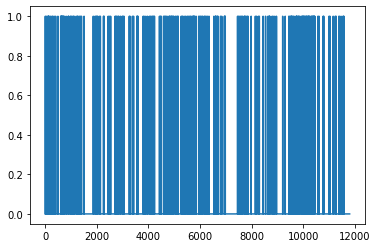

In [3]:
# 3. Dataset labels parsing

labels = pd.read_csv("datasets/eggnog/Labels.tsv", sep='\t')
sFrames, eFrames = list(), list()
data = dict()
lastFile = ""
n=0
ns, nf = 0, 0
for i in range(len(labels)) :
    l = labels.loc[i]
    n+=1
    #if n > 10000 : break
    # else : print(str(n)+"/400")
    if lastFile != "" and lastFile != l["File Name"] :
        lastFile = lastFile.replace("\\", "/")
        eggSkel = load_eggnog_skeleton(lastFile+"_Skeleton.txt")
        timestampsOk = False
        try:
            timestamps = load_timestamps(lastFile+"_RGB.frames")
            timestampsOk = True
        except FileNotFoundError:
            try:
                timestamps = load_timestamps(lastFile+"_Video.frames")
                timestampsOk = True
            except FileNotFoundError:
                print(lastFile+ " ignored, no frame file found")
                nf +=1
        if(timestampsOk) :
            frames = eggSkel.drop(["Index", "Time"], 1).values
            print(lastFile)
            labs = list(map(createFrameTest(sFrames, eFrames, timestamps.values), eggSkel.values))
            data[lastFile] = [frames, labs]
            #print(lastFile+ " ignored, no frame file found")
            ns += 1
        sFrames, eFrames = list(), list()
    lastFile = l["File Name"]
    sFrames.append(l["Start Frame"])
    eFrames.append(l["End Frame"])
    
print(str(ns) +" files loaded for "+str(nf)+" fails (frames file not found), itered on "+str(n)+" total labels")
plt.plot(data['s01/part1_layout_p02/20151105_191251_00'][1])

In [4]:
# 4. Dataset tf inputable preparation 

def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

past_history = 10
future_target = 0
STEP = 1
TRAIN_SPLIT = None
BUFFER_SIZE = 10000
BATCH_SIZE = 256

x_train_single, y_train_single = [[[]]], [[[]]]

i = 0

for file in data :
    i += 1
    if i > 50 : break # reducing dataset size for first tries
    print(str(i) + ". Processing "+file+"..")
    X = data[file][0]
    Y = data[file][1]
    x_train_step, y_train_step = multivariate_data(X, Y, 0,
                                                       TRAIN_SPLIT, past_history,
                                                       future_target, STEP,
                                                       single_step=True)
    x_train_single += x_train_step.tolist()
    y_train_single += y_train_step.tolist()

x_train_single, y_train_single = x_train_single[1:], y_train_single[1:]
# x_val_single, y_val_single = multivariate_data(X, Y,
#                                               TRAIN_SPLIT, None, past_history,
#                                               future_target, STEP,
#                                               single_step=True)

# train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
# train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
# val_data_single = val_data_single.batch(BATCH_SIZE).repeat()
print("done!")

1. Processing s01/part1_layout_p02/20151105_191251_00..
2. Processing s01/part1_layout_p02/20151105_192144_00..
3. Processing s01/part1_layout_p02/20151105_192312_00..
4. Processing s01/part1_layout_p02/20151105_192407_00..
5. Processing s01/part1_layout_p02/20151105_192610_00..
6. Processing s01/part1_layout_p02/20151105_192717_00..
7. Processing s01/part1_layout_p02/20151105_193157_00..
8. Processing s01/part2_layout_p01/20151105_194301_00..
9. Processing s01/part2_layout_p01/20151105_194456_00..
10. Processing s01/part2_layout_p01/20151105_194650_00..
11. Processing s01/part2_layout_p01/20151105_194955_00..
12. Processing s01/part2_layout_p01/20151105_195111_00..
13. Processing s01/part2_layout_p01/20151105_195450_00..
14. Processing s02/part1_layout_p04/20151106_214357_00..
15. Processing s02/part1_layout_p04/20151106_214521_00..
16. Processing s02/part1_layout_p04/20151106_214647_00..
17. Processing s02/part1_layout_p04/20151106_215028_00..
18. Processing s02/part1_layout_p04/2015

In [5]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [6]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(100))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
epochs = 10
batch_size = 64

x_train_single = np.array(x_train_single)
y_train_single = np.array(y_train_single)

history = single_step_model.fit(x_train_single, y_train_single, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 92597 samples, validate on 10289 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
92597/92597 [==============================] - 11s 116us/sample - loss: 0.0442 - val_loss: 0.0438
Epoch 2/10
92597/92597 [==============================] - 10s 111us/sample - loss: 0.0261 - val_loss: 0.0364
Epoch 3/10
92597/92597 [==============================] - 10s 108us/sample - loss: 0.0239 - val_loss: 0.0369
Epoch 4/10
92597/92597 [==============================] - 10s 110us/sample - loss: 0.0227 - val_loss: 0.0344
Epoch 5/10
92597/92597 [==============================] - 10s 110us/sample - loss: 0.0217 - val_loss: 0.0341
Epoch 6/10
92597/92597 [==============================] - 10s 110us/sample - loss: 0.0206 - val_loss: 0.0327
Epoch 7/10
92597/92597 [==============================] - 10s 110us/sample - loss: 0.0199 - val_loss: 0.0324
Epoch 8/10
92597/92597 [==============================] - 10s 110us/sample - loss: 0.0195 - v

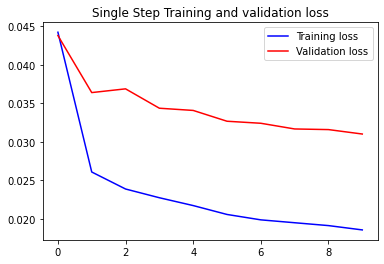

In [8]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

plot_train_history(history, 'Single Step Training and validation loss')

In [9]:
predicted=[]
length=len(x_train_single)
for i in range (length-10):
    if i%100==0:
        print(i)
    predicted.append(single_step_model.predict(x_train_single[i:i+10])[9][0])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

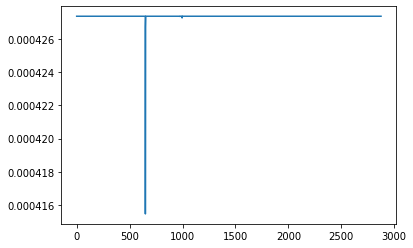

In [10]:
# 04/24 first 

plt.plot(predicted[100000:])

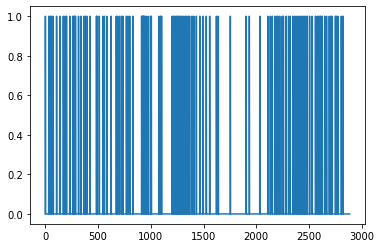

In [11]:
plt.plot(y_train_single[100000:])